## **Aba Pobee**
### DATS 2103-10
### Final Project

##**Section 1-- Downloading and Working With Data**



### Hourly Earnings Data

I downloaded 50 years worth of data showing the average hourly earnings of production and nonsupervisory employees from 1974-2024. This data is seasonally adjusted and covers only private sector employees. The dataset separates wages by month and year.

In [74]:
import pandas as pd
from pandas import read_csv

In [75]:
Earnings = read_csv("Earnings.csv")
Earnings.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1974,4.27,4.29,4.32,4.33,4.40,4.44,4.45,4.49,4.53,4.56,4.57,4.60
1,1975,4.61,4.64,4.67,4.67,4.69,4.72,4.74,4.78,4.79,4.82,4.86,4.87
2,1976,4.90,4.93,4.95,4.98,5.01,5.03,5.06,5.11,5.14,5.16,5.21,5.23
3,1977,5.26,5.30,5.32,5.36,5.40,5.42,5.46,5.48,5.51,5.55,5.58,5.61
4,1978,5.66,5.69,5.73,5.79,5.82,5.86,5.90,5.92,5.97,6.02,6.05,6.10


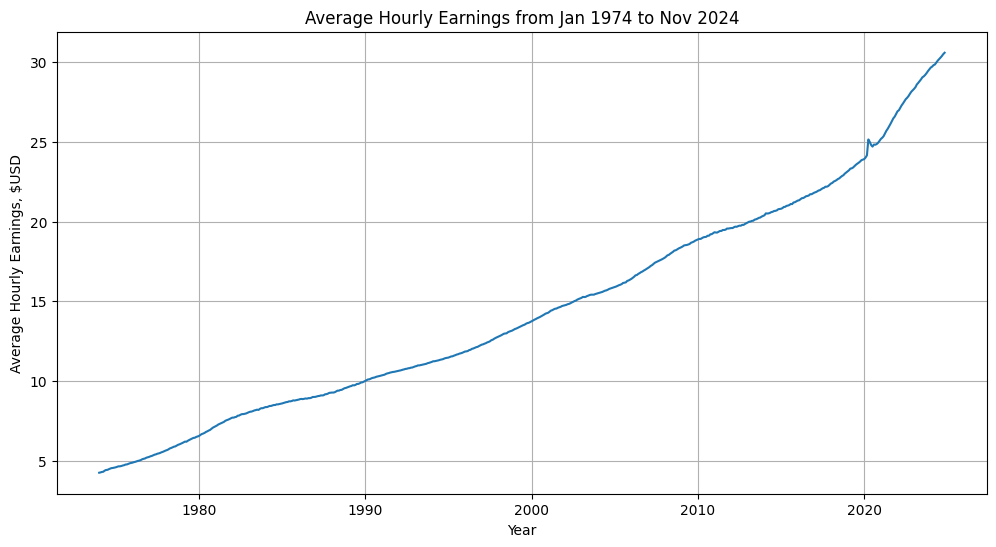

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

earnings_long = pd.melt(Earnings, id_vars=['Year'], var_name='Month', value_name='Earnings')

earnings_long['Date'] = pd.to_datetime(earnings_long['Year'].astype(str) + '-' + earnings_long['Month'], format='%Y-%b')

earnings_long = earnings_long.set_index('Date')

start_date = pd.to_datetime('1974-01-01')
end_date = pd.to_datetime('2024-11-01')
filtered_earnings = earnings_long.loc[start_date:end_date]['Earnings']

filtered_earnings = filtered_earnings.groupby(filtered_earnings.index).mean()

plt.figure(figsize=(12, 6))
plt.plot(filtered_earnings.index, filtered_earnings.values)
plt.xlabel('Year')
plt.ylabel('Average Hourly Earnings, $USD')
plt.title('Average Hourly Earnings from Jan 1974 to Nov 2024')
plt.grid(True)
plt.show()

Above is a line graph visualizing the growth of earnings from 1974 to 2024-- average hourly earnings have increased over $20 in the past 50 years!

I chose to break down the basic statistics (mean, median, min and max, standard deviation) of the hourly earnings by month for each decade in the past 50 years.

**For 1974:** Low earnings reflective of the 1970s economy, with minimal variability (standard deviation: 0.11). Steady growth over the year indicates consistent wage increases.

**For 1984:** Earnings almost doubled compared to 1974, reflecting the impact of inflation and economic growth during the 1980s. Variability (standard deviation: 0.07) is lower, indicating a stable wage environment.

**For 1994:** Continued wage growth through the 1990s, though at a slower pace compared to the previous decade. Variability remains low (standard deviation: 0.08), suggesting consistent wages over the year.

**For 2004:** Wages increased significantly compared to 1994, reflecting post-dot-com recovery and pre-recession growth. Variability remains modest (standard deviation: 0.12), indicating stable private-sector earnings.

**For 2014:** Earnings surged during the recovery from the 2008 financial crisis. Variability is similar to earlier decades (standard deviation: 0.11), showing stability despite economic challenges.

**For 2024:** A dramatic increase in wages over the past decade, possibly due to inflation, labor market changes, and economic policies post-COVID-19. Higher variability (standard deviation: 0.30) could reflect ongoing adjustments or external disruptions.

In [77]:
years = [1974, 1984, 1994, 2004, 2014, 2024]
results = []

for year in years:
    year_data = earnings_long[earnings_long['Year'] == year]

    mean_earnings = year_data['Earnings'].mean()
    min_earnings = year_data['Earnings'].min()
    max_earnings = year_data['Earnings'].max()
    std_earnings = year_data['Earnings'].std()
    median_earnings = year_data['Earnings'].median()

    min_month = year_data.loc[year_data['Earnings'] == min_earnings, 'Month'].iloc[0]
    max_month = year_data.loc[year_data['Earnings'] == max_earnings, 'Month'].iloc[0]

    results.append([year, mean_earnings, min_earnings, min_month, max_earnings, max_month, std_earnings, median_earnings])

earning_stats = pd.DataFrame(results, columns=['Year', 'Mean', 'Minimum', 'Min Month', 'Maximum', 'Max Month', 'Std Dev', 'Median'])

earning_stats

,Year,Mean,Minimum,Min Month,Maximum,Max Month,Std Dev,Median
0,1974,4.437500,4.27,Jan,4.60,Dec,0.115611,4.445
1,1984,8.487500,8.38,Jan,8.61,Dec,0.075453,8.495
2,1994,11.333333,11.21,Jan,11.47,Dec,0.084351,11.325
3,2004,15.683333,15.51,Jan,15.86,Dec,0.122053,15.680
4,2014,20.596667,20.39,Jan,20.77,Nov,0.110151,20.600
5,2024,30.073636,29.64,Jan,30.57,Nov,0.319132,30.070


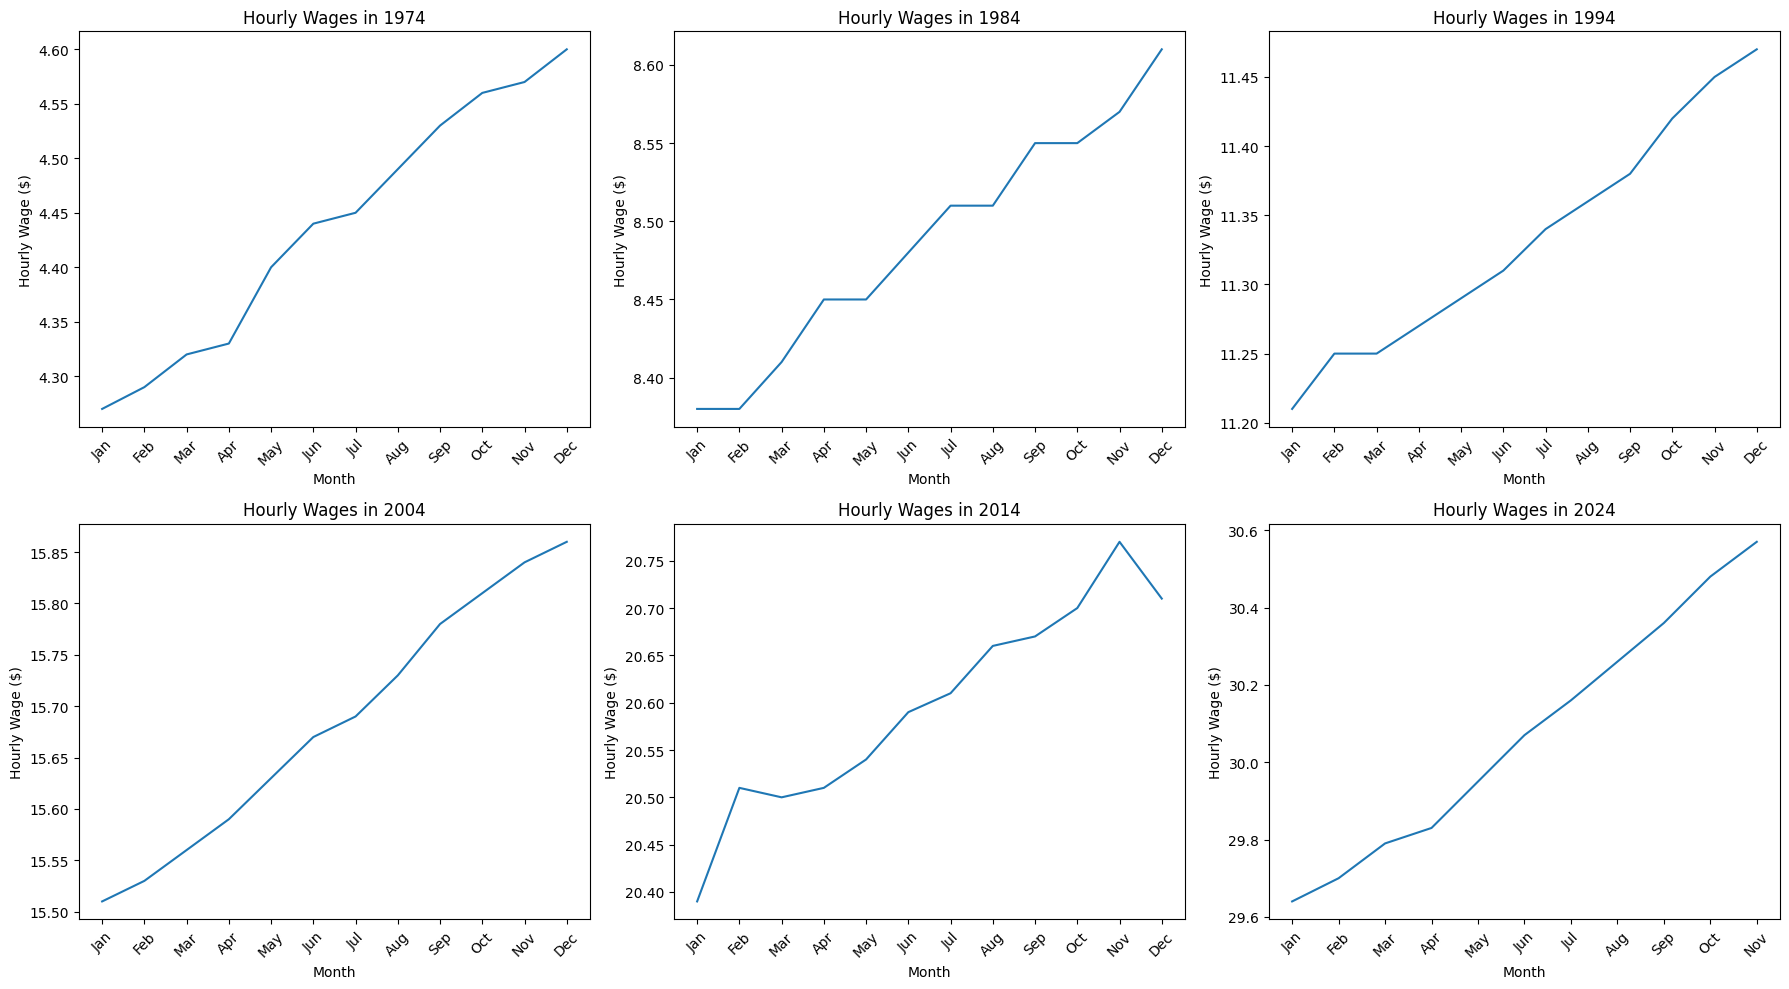

In [78]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, year in enumerate(years):
    yearly_data = earnings_long[earnings_long['Year'] == year]
    axes[i].plot(yearly_data['Month'], yearly_data['Earnings'])
    axes[i].set_title(f'Hourly Wages in {year}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Hourly Wage ($)')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

What I find striking is how the change in average hourly wages  nearly doubled in the past ten years from 2014 to 2024; whereas from 1974-2014, wages increased about $4-5 every ten years, average wages increased nearly 10 in the past decade.

The COVID-19 pandemic, technological advances, and changes in the economy likely play a large role in this shift-- I decided to visualize and look at the statistics for the year 2020 as well:

In [79]:
year_2020_data = earnings_long[earnings_long['Year'] == 2020]

min_earnings_2020 = year_2020_data['Earnings'].min()
max_earnings_2020 = year_2020_data['Earnings'].max()
mean_earnings_2020 = year_2020_data['Earnings'].mean()
median_earnings_2020 = year_2020_data['Earnings'].median()
std_earnings_2020 = year_2020_data['Earnings'].std()


stats_2020 = pd.DataFrame({
    'Statistic': ['Minimum', 'Maximum', 'Mean', 'Median', 'Standard Deviation'],
    'Value': [min_earnings_2020, max_earnings_2020, mean_earnings_2020, median_earnings_2020, std_earnings_2020]
})

stats_2020

,Statistic,Value
0,Minimum,23.910000
1,Maximum,25.160000
2,Mean,24.687500
3,Median,24.815000
4,Standard Deviation,0.426425


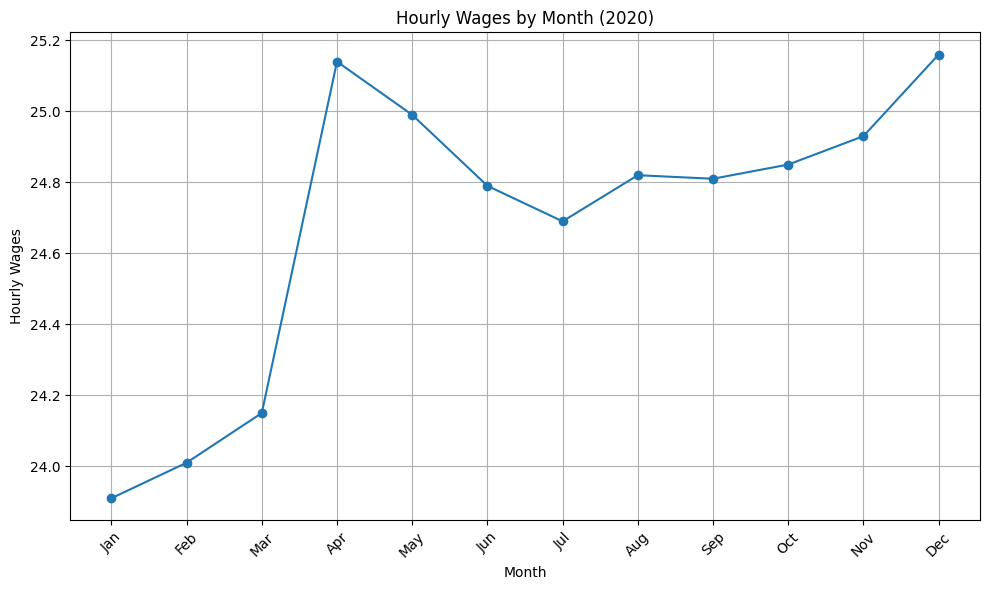

In [80]:
earnings_2020 = earnings_long[earnings_long['Year'] == 2020]

plt.figure(figsize=(10, 6))
plt.plot(earnings_2020['Month'], earnings_2020['Earnings'], marker='o')
plt.xlabel('Month')
plt.ylabel('Hourly Wages')
plt.title('Hourly Wages by Month (2020)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Predictably, wages skyrocketed and were then prone to further fluctation starting in March 2020, when the pandemic first started to rock the world's workforces and economy. This justifies the year's standard deviation of 0.42, which is significantly greater than the rest of the years analyzed. The effects of the pandemic likely played a large role in the overall wage changes from 2014 to 2024.

### Unemployment Data

I also downloaded data showing the monthly unemployment rate from 1974 to 2024. This data is seasonally adjusted as well. The dataset separates unemployment rate also by month and year.

In [81]:
Unemployment = read_csv("Unemployment.csv")
Unemployment.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1974,5.1,5.2,5.1,5.1,5.1,5.4,5.5,5.5,5.9,6.0,6.6,7.2
1,1975,8.1,8.1,8.6,8.8,9.0,8.8,8.6,8.4,8.4,8.4,8.3,8.2
2,1976,7.9,7.7,7.6,7.7,7.4,7.6,7.8,7.8,7.6,7.7,7.8,7.8
3,1977,7.5,7.6,7.4,7.2,7.0,7.2,6.9,7.0,6.8,6.8,6.8,6.4
4,1978,6.4,6.3,6.3,6.1,6.0,5.9,6.2,5.9,6.0,5.8,5.9,6.0


I went ahead and started by simply plotting the unemployment rate over time for the past 50 years.

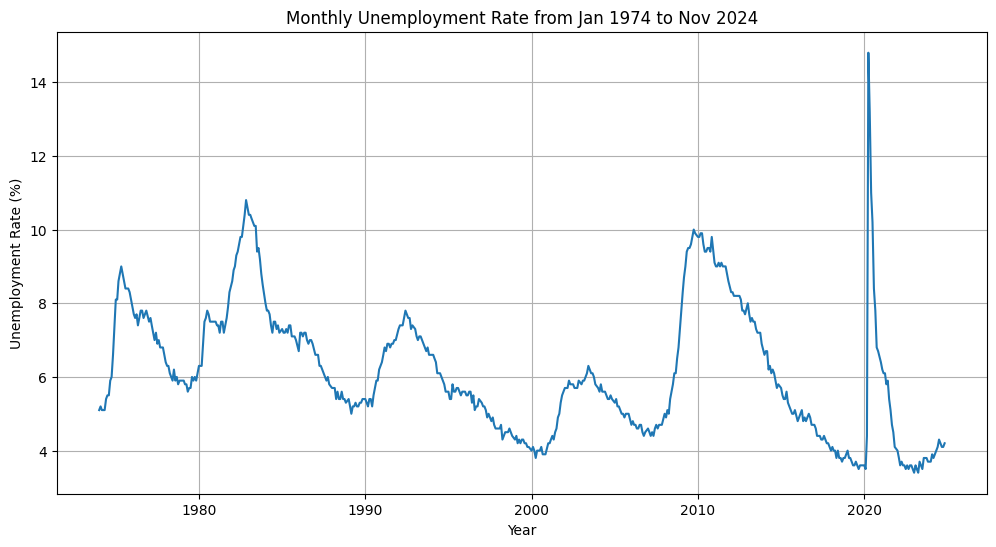

In [82]:
unemployment_long = pd.melt(Unemployment, id_vars=['Year'], var_name='Month', value_name='Unemployment Rate')

unemployment_long['Date'] = pd.to_datetime(unemployment_long['Year'].astype(str) + '-' + unemployment_long['Month'], format='%Y-%b')

unemployment_long = unemployment_long.set_index('Date')

start_date = pd.to_datetime('1974-01-01')
end_date = pd.to_datetime('2024-11-01')
filtered_unemployment = unemployment_long.loc[start_date:end_date]['Unemployment Rate']

filtered_unemployment = filtered_unemployment.groupby(filtered_unemployment.index).mean()

plt.figure(figsize=(12, 6))
plt.plot(filtered_unemployment.index, filtered_unemployment.values)
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Monthly Unemployment Rate from Jan 1974 to Nov 2024')
plt.grid(True)
plt.show()

Look at that spike in 2020! Applying some historical context, the cyclical spikes in this graph can be explained by several world events in the past decades that have impacted the global economy and thus the unemployment rate, such as high inflation in the early 80's, the dot-com bubble burst and the 9/11 terrorist attacks in 2001, the 2008 financial crisis (Great Recession), and most notably the COVID-19 pandemic causing the greatest peak in unemployment rates.

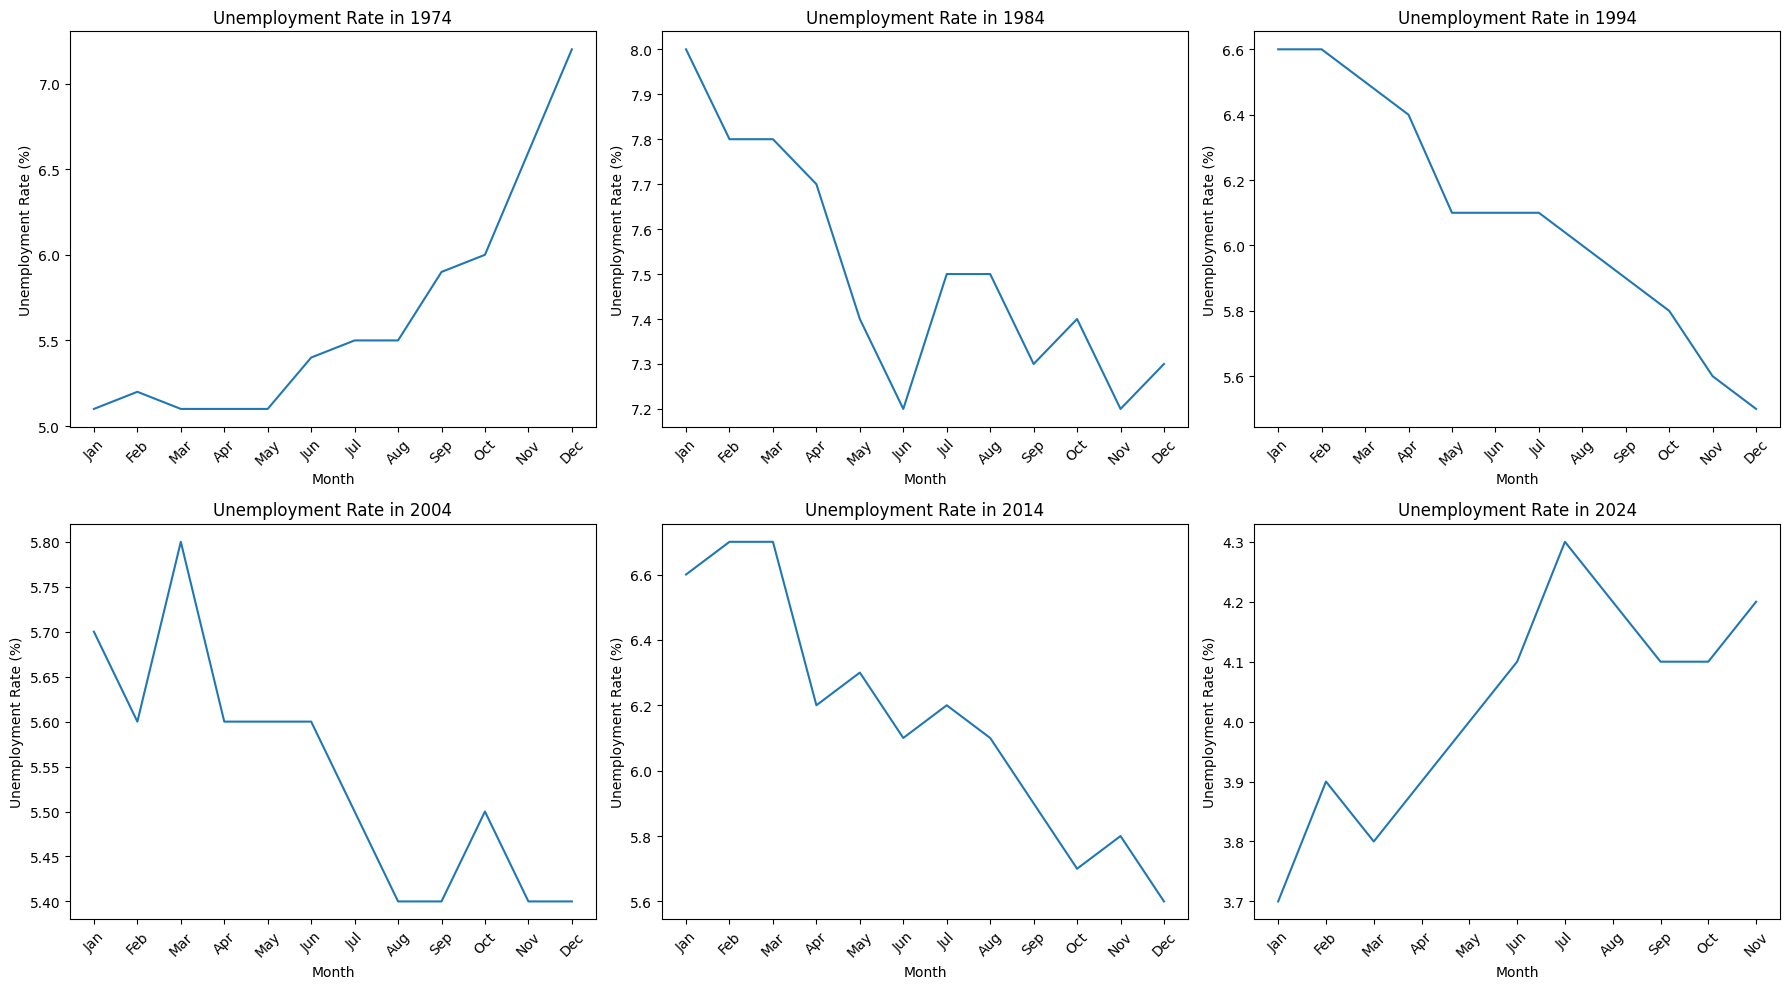

In [83]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

years_unemployment = [1974, 1984, 1994, 2004, 2014, 2024]

for i, year in enumerate(years_unemployment):
    yearly_data = unemployment_long[unemployment_long['Year'] == year]

    if not yearly_data.empty:
        axes[i].plot(yearly_data['Month'], yearly_data['Unemployment Rate'])
        axes[i].set_title(f'Unemployment Rate in {year}')
        axes[i].set_xlabel('Month')
        axes[i].set_ylabel('Unemployment Rate (%)')
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].text(0.5, 0.5, f'No data for {year}', ha='center', va='center')

plt.tight_layout()
plt.show()

Unlike the hourly earnings rate over time, unemployment rate vastly fluctuates by month and year. A lot changes within the global economy on a yearly basis, so it makes sense that the data is not as consistent as hourly earnings.

## **Section 2: Defining a Problem**

My main objective is to **predict average hourly earnings for a given month/year based on historical data and external economic factors, such as unemployment rates**. This predictive analytics problem is applicable to the real world-- wage forecasting is essential for policymakers, businesses, and economic analysts. Including indicators like unemployment rates allows for more accurate and context-sensitive predictions.

This is a regression problem, since I am aiming to predict results within a continuous output. My **response** variable is average hourly earnings, with my **predictors** being time (year, month), lagged earnings, unemployment rate, and the *change* in unemployment rate. Here's a further breakdown of why I chose each predictor:



**Time Features:**

* Year (continuous or categorical): Captures long-term trends.

* Month (categorical): Accounts for seasonality in wages.
* Lagged Earnings:
Earnings from the previous month(s): Captures momentum or inertia in wage trends.

**Economic Predictors:**

* Unemployment Rate:
Reflects the state of the labor market. Higher unemployment rates typically suppress wage growth, while lower rates may increase wages.

* Unemployment Rate Change (Lagged Rate):
Highlights sudden economic shocks or improvements. Abrupt changes in unemployment may precede shifts in earnings.

##**Section 3: Implementing and Justifying Model Selections**

### Dataset Setup

I need to properly prepare this dataset for model implementation. First I begin with merging the Unemployment and Earnings datasets.

In [84]:
from sklearn.preprocessing import OneHotEncoder

earnings_long = pd.melt(Earnings, id_vars=['Year'], var_name='Month', value_name='Earnings')
earnings_long['Date'] = pd.to_datetime(earnings_long['Year'].astype(str) + '-' + earnings_long['Month'], format='%Y-%b')
earnings_long = earnings_long.set_index('Date')

unemployment_long = pd.melt(Unemployment, id_vars=['Year'], var_name='Month', value_name='Unemployment Rate')
unemployment_long['Date'] = pd.to_datetime(unemployment_long['Year'].astype(str) + '-' + unemployment_long['Month'], format='%Y-%b')
unemployment_long = unemployment_long.set_index('Date')

#merging the data
merged_data = pd.merge(earnings_long, unemployment_long, left_index=True, right_index=True, how='inner')

merged_data['Year'] = merged_data.index.year
merged_data['Month'] = merged_data.index.month

#lag
merged_data['Earnings_Lag1'] = merged_data['Earnings'].shift(1)
merged_data['Unemployment_Rate_Lag1'] = merged_data['Unemployment Rate'].shift(1)

#delta unemployment
merged_data['Unemployment_Rate_Change'] = merged_data['Unemployment Rate'].diff()

#onehot
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_months = encoder.fit_transform(merged_data[['Month']])
encoded_months_df = pd.DataFrame(encoded_months, columns=[f"Month_{i}" for i in range(12)], index = merged_data.index)

merged_data = pd.concat([merged_data, encoded_months_df], axis=1)

#handle missingna
merged_data.dropna(inplace=True)
merged_data = merged_data.drop(['Year', 'Month'], axis =1)

merged_data = merged_data.rename(columns={
    'Year_x': 'Year',
    'Month_x': 'Month',
    'Earnings': 'Earnings',
    'Unemployment Rate': 'Unemployment_Rate'
})
merged_data = merged_data.drop(columns=['Year_y', 'Month_y'])
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 610 entries, 1975-01-01 to 2023-12-01
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      610 non-null    int64  
 1   Month                     610 non-null    object 
 2   Earnings                  610 non-null    float64
 3   Unemployment_Rate         610 non-null    float64
 4   Earnings_Lag1             610 non-null    float64
 5   Unemployment_Rate_Lag1    610 non-null    float64
 6   Unemployment_Rate_Change  610 non-null    float64
 7   Month_0                   610 non-null    float64
 8   Month_1                   610 non-null    float64
 9   Month_2                   610 non-null    float64
 10  Month_3                   610 non-null    float64
 11  Month_4                   610 non-null    float64
 12  Month_5                   610 non-null    float64
 13  Month_6                   610 non-null    floa

### Linear Regression

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

merged_data = merged_data.drop(columns=['Month'])

# Define features (X) and target (y)
X = merged_data.drop('Earnings', axis=1)
y = merged_data['Earnings']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.1683006697270926
R-squared: 0.9714222809079619


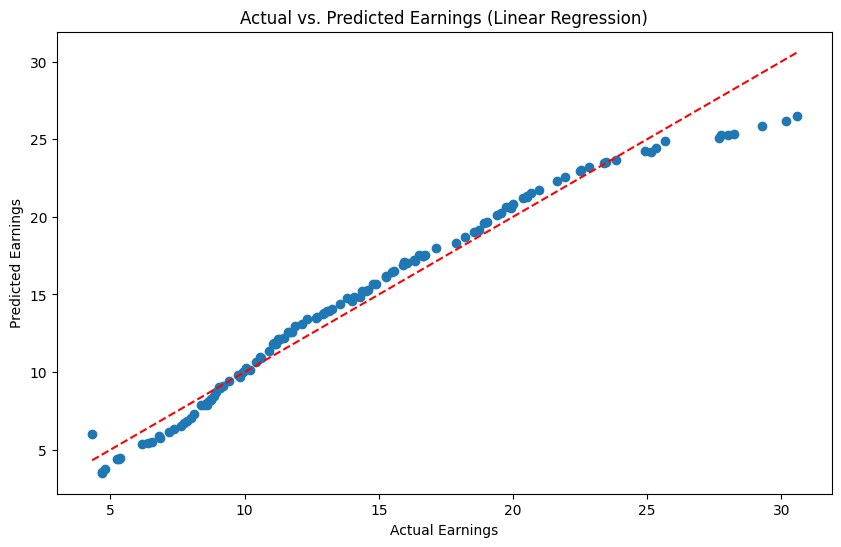

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Earnings")
plt.ylabel("Predicted Earnings")
plt.title("Actual vs. Predicted Earnings (Linear Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line for reference
plt.show()

After preparing the merged dataset, I've first used a linear regression model as a simple and interpretable
baseline to evaluate the performance of more complex models.

The combination of a relatively low MSE of 1.168 and a very high R-squared of 0.971 suggests that the linear regression model is performing well in predicting average hourly earnings based on the given features. The model's predictions are relatively close to the actual values, and it captures a large proportion of the variability in earnings.

### Lasso Regression

In [87]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

lasso = LassoCV(cv=10, random_state=42).fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression MSE: {mse_lasso}')
print(f'Lasso Selected Features: {sum(lasso.coef_ != 0)}')


Lasso Regression MSE: 1.1847310745614108
Lasso Selected Features: 2


### PCR Regression

In [88]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

n_components = 10
X_train_pca = X_train_pca[:, :n_components]
X_test_pca = X_test_pca[:, :n_components]

model_pcr = LinearRegression().fit(X_train_pca, y_train)

y_pred_pcr = model_pcr.predict(X_test_pca)
mse_pcr = mean_squared_error(y_test, y_pred_pcr)
print(f'Principal Component Regression MSE: {mse_pcr}')

Principal Component Regression MSE: 1.1725825391675309


### Model Evaluation and Takeaways

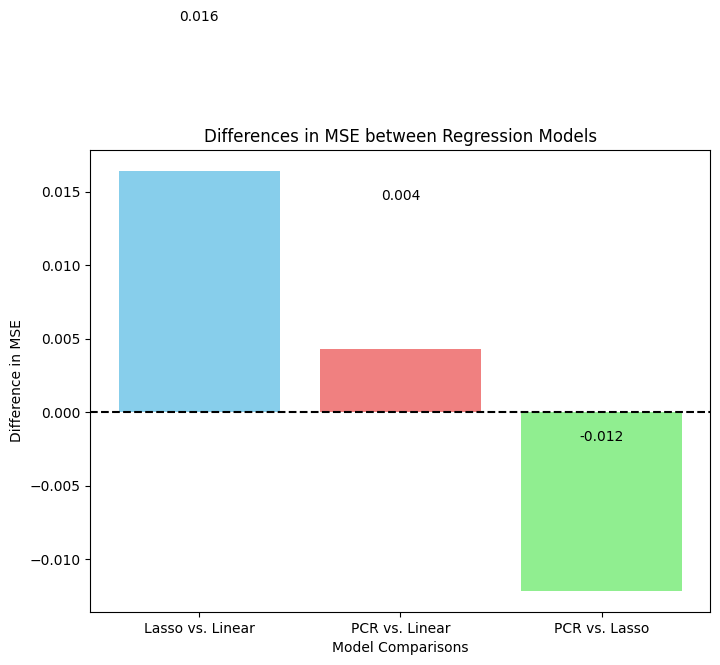

In [89]:
differences = {
    'Lasso vs. Linear': mse_lasso - mse,
    'PCR vs. Linear': mse_pcr - mse,
    'PCR vs. Lasso': mse_pcr - mse_lasso,
}


plt.figure(figsize=(8, 6))
plt.bar(differences.keys(), differences.values(), color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Model Comparisons")
plt.ylabel("Difference in MSE")
plt.title("Differences in MSE between Regression Models")
plt.axhline(y=0, color='black', linestyle='--')
for i, v in enumerate(differences.values()):
    plt.text(i, v + 0.01, str(round(v,3)), ha='center', va='bottom')
plt.show()

**Linear Regression (Baseline Model):**

  MSE: 1.1683 (lowest among the three models).

  R-squared: 0.9714 (very high, indicating the model explains 97% of the variance in the target variable).

  Takeaway: Linear regression is performing very well, likely because the dataset has strong linear relationships between predictors and the response variable (Earnings).


**Lasso Regression:**

  MSE: 1.1847 (slightly higher than Linear Regression).

  Selected Features: 2 predictors (out of many), showing that Lasso effectively reduced the complexity of the model.

  Takeaway: Lasso is slightly less accurate but simplifies the model by focusing on the most important predictors. This may improve interpretability and robustness to overfitting.


**Principal Component Regression (PCR):**

  MSE: 1.1726 (close to Linear Regression and Lasso).

  Takeaway: PCR successfully reduces dimensionality, which might help in cases of multicollinearity. However, in this dataset, it does not outperform the simpler linear regression model.

### Application: Predicting Average Hourly Wages for December 2024

In [94]:
import statsmodels.api as sm

X = merged_data.drop('Earnings', axis=1)
y = merged_data['Earnings']

model = sm.OLS(y, X)
model = model.fit()

In [91]:
november_2024_earnings = 30.57
november_2024_unemployment_rate = 4.2
october_2024_unemployment_rate = 4.1

unemployment_rate_change = november_2024_unemployment_rate - october_2024_unemployment_rate

december_2024_features = {
    'Earnings_Lag1': november_2024_earnings,
    'Unemployment_Rate': november_2024_unemployment_rate,
    'Unemployment_Rate_Lag1': october_2024_unemployment_rate,
    'Unemployment_Rate_Change': unemployment_rate_change,
    'Month_0': 0,
    'Month_1': 0,
    'Month_2': 0,
    'Month_3': 0,
    'Month_4': 0,
    'Month_5': 0,
    'Month_6': 0,
    'Month_7': 0,
    'Month_8': 0,
    'Month_9': 0,
    'Month_10': 0,
    'Month_11': 1,  #December is Month_11 in one-hot encoding
}

import pandas as pd
december_2024_df = pd.DataFrame([december_2024_features])


In [96]:
last_date = merged_data.index[-1]
dec_2024_data = merged_data.iloc[[-1]].copy()
dec_2024_data.index = pd.to_datetime(['2024-12-01'])

dec_2024_data['Earnings_Lag1'] = merged_data['Earnings'].iloc[-1]
dec_2024_data['Unemployment_Rate_Lag1'] = merged_data['Unemployment_Rate'].iloc[-1]
dec_2024_data['Unemployment_Rate_Change'] = 0

for col in dec_2024_data.columns:
    if col.startswith("Month_"):
        dec_2024_data[col] = 0

dec_2024_data['Month_11'] = 1

dec_2024_data = dec_2024_data.drop(columns=['Earnings'])

dec_2024_data = dec_2024_data[X.columns]

predicted_earnings_dec_2024 = model.predict(dec_2024_data)

print(f"Predicted average hourly earnings for December 2024: {predicted_earnings_dec_2024[0]}")

Predicted average hourly earnings for December 2024: 26.149587524642925


<ipython-input-96-75e4e21630cd>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted average hourly earnings for December 2024: {predicted_earnings_dec_2024[0]}")


<ipython-input-97-b69722e4495d>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(12, predicted_earnings_dec_2024[0], color='red', label='Predicted Dec 2024 Earnings')


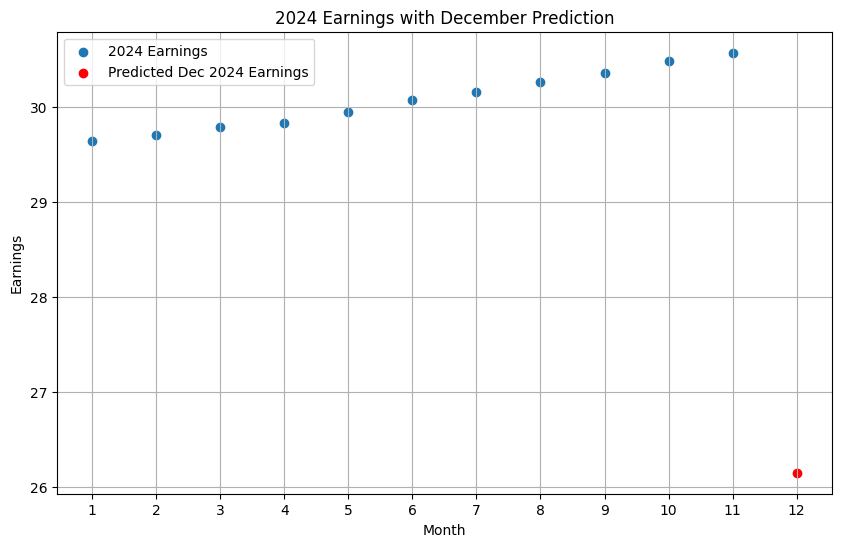

In [97]:
import matplotlib.pyplot as plt

earnings_2024 = merged_data[merged_data.index.year == 2024]['Earnings']
months_2024 = merged_data[merged_data.index.year == 2024].index.month

plt.figure(figsize=(10, 6))
plt.scatter(months_2024, earnings_2024, label='2024 Earnings')

plt.scatter(12, predicted_earnings_dec_2024[0], color='red', label='Predicted Dec 2024 Earnings')

plt.xlabel('Month')
plt.ylabel('Earnings')
plt.title('2024 Earnings with December Prediction')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()

The predicted average hourly earnings for December 2024 using the trained linear regression model was about $26.15. This result, no matter what approach I took, baffled me– earnings for all of 2024 have been trending around $30, so to see a predicted amount of $26 seemed quite inaccurate to me. However, not every model is perfect, and all models may perform in ways that don’t meet expectations, even if they seem reliable.

## Section 4: Drawing Data Driven Conclusions

To do a well-rounded recap of what I’ve found, I’ve observed that the steady growth in wages over the decades reflects a combination of inflation, productivity improvements, and evolving labor market dynamics. Lagged wages and unemployment rates were identified as the most influential predictors, with higher unemployment generally suppressing wage growth and lower rates driving increases. This finding aligns with established economic theories, highlighting the importance of labor market conditions in determining wages.

The models I chose to develop—Linear Regression, Lasso Regression, and Principal Component Regression—revealed strengths and limitations. Linear Regression provided the highest predictive accuracy, with an R-squared value of 0.97, showing a strong linear relationship between the predictors and wages. Lasso Regression simplified the model by narrowing the focus to two critical predictors, enhancing interpretability without a substantial loss in accuracy. Principal Component Regression effectively reduced dimensionality but didn’t really offer any significant improvement over simpler models.

However, I ran into roadblocks when attempting to predict wages for December 2024. The unexpectedly low predicted value of $26 highlighted the sensitivity of the models to assumptions about future unemployment rates and economic stability. This got me to think: How might adding additional economic indicators, such as inflation or GDP, enhance the accuracy and robustness of these models? Could non-linear methods, such as neural networks, uncover deeper patterns in wage dynamics that traditional regression techniques miss?

This problem demonstrates that while regression models are valuable tools for understanding and predicting wages, their reliability hinges on the quality of input data and the stability of underlying economic conditions. I think I could improve upon this in future research by expanding the dataset to include broader macroeconomic factors and test the models’ adaptability to scenarios of significant economic disruption. Maybe by addressing these questions, we can develop more comprehensive and reliable tools for wage forecasting.

